# MNIST 손글씨 - Convolutional Neural Network Ver.3
- Conv2D 2 layers
- MaxPooling2D 1 layer
- Dropout 2 layers

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

In [5]:
# 2차원 데이터(28x28)를 3차원으로(28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

In [6]:
# 0 ~ 1 사이의 값으로 정규화 
X_train = X_train / 255.0
X_train.shape

(60000, 28, 28, 1)

In [7]:
# X_test 에 대해서도 동일하게 처리
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test / 255.0
X_test.shape

(10000, 28, 28, 1)

In [8]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

### 모델 정의, 설정, 학습

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [10]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 모델 최적화
model_path = MODEL_DIR + 'best-mnist-cnn-v3.hdf5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                             verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=50, batch_size=200, verbose=0,
                    callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss improved from inf to 0.05516, saving model to ./model/best-mnist-cnn-v3.hdf5

Epoch 00002: val_loss improved from 0.05516 to 0.04916, saving model to ./model/best-mnist-cnn-v3.hdf5

Epoch 00003: val_loss improved from 0.04916 to 0.03824, saving model to ./model/best-mnist-cnn-v3.hdf5

Epoch 00004: val_loss improved from 0.03824 to 0.03594, saving model to ./model/best-mnist-cnn-v3.hdf5

Epoch 00005: val_loss did not improve from 0.03594

Epoch 00006: val_loss improved from 0.03594 to 0.03407, saving model to ./model/best-mnist-cnn-v3.hdf5

Epoch 00007: val_loss improved from 0.03407 to 0.03407, saving model to ./model/best-mnist-cnn-v3.hdf5

Epoch 00008: val_loss did not improve from 0.03407

Epoch 00009: val_loss did not improve from 0.03407

Epoch 00010: val_loss did not improve from 0.03407

Epoch 00011: val_loss did not improve from 0.03407

Epoch 00012: val_loss did not improve from 0.03407

Epoch 00013: val_loss did not improve from 0.03407

Epoch 00014: va

In [15]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)

In [16]:
# 정확도
acc = best_model.evaluate(X_test, Y_test)
print(f'정확도: {acc[1]:.4f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0291 - accuracy: 0.9907
정확도: 0.9907


### 훈련과정 시각화

In [17]:
# 훈련셋과 검증셋의 오차
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

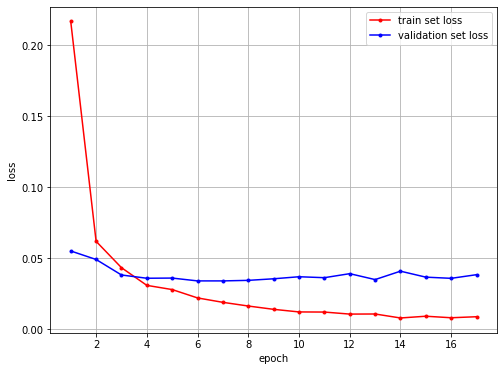

In [18]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_loss, c='red', marker='.', label='train set loss')
plt.plot(x_len, y_vloss, c='blue', marker='.', label='validation set loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()